<a href="https://colab.research.google.com/github/nathannguyen33/CreditApproval/blob/main/CreditApprovalDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Approval Dataset Analysis <br> **Name:** Nathan Nguyen and Charlie Nguyen<br>**Course:** CS 171

## 2. Dataset Description

**Goal:**  
The objective of this project is to develop a machine learning model that can accurately predict whether a credit application should be approved or denied based on applicant data. This has real-world implications for improving fairness, transparency, and consistency in credit evaluations.

**Target Variable:**  
- `A16` – The target variable represents whether a credit application is approved (`+`) or denied (`-`).  
  For modeling purposes, we will convert these to binary values: `1` for approved and `0` for denied.

**Features:**  
The dataset contains 15 anonymized features (`A1` to `A15`), which include a mix of categorical and numerical attributes. These attributes represent basic demographic, financial, and credit-related information of the applicant:

- **Categorical Attributes (9 total)** – Represented by nominal values (e.g., A1, A4, A5, A6, A7, A9, A10, A12, A13)
- **Numerical Attributes (6 total)** – Continuous values (e.g., A2, A3, A8, A11, A14, A15)

While the exact feature names are anonymized, they generally correspond to:
- Personal details such as age and gender
- Financial indicators like income level and existing credit lines
- Application details and credit history

**Dataset Size:**  
- **Total records:** 690  
- **Features:** 15 input attributes + 1 target column = 16 columns

**Missing Data:**  
Missing values are denoted using the `"?"` symbol and are present in both categorical and numerical attributes. We will address these during data cleaning through imputation or removal, depending on the impact and distribution of missing data.

**Planned Preprocessing:**  
- Replace missing values appropriately
- Encode categorical variables
- Normalize numerical features
- Explore and create relevant features for better model accuracy

This preparation will allow the dataset to be compatible with various baseline models such as logistic regression, decision trees, and ensemble methods, which we plan to compare.


In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
column_names = ["A" + str(i) for i in range(1, 16)] + ["A16"]
df = pd.read_csv(url, header=None, names=column_names, na_values="?")
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


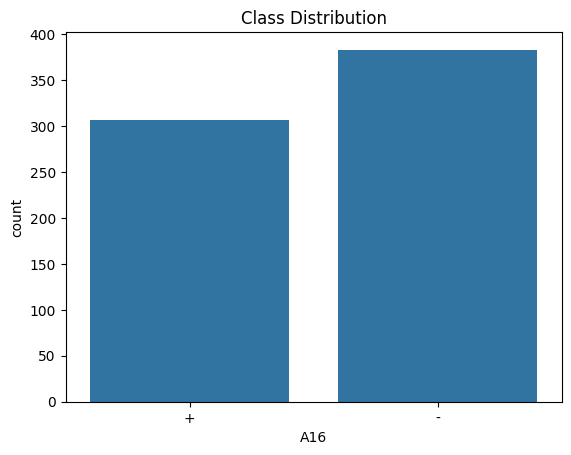

In [ ]:


sns.countplot(x='A16', data=df)
plt.title('Class Distribution')
plt.show()

## 5. Observations from the Data Visualization

Initial visualizations of the dataset revealed several key insights:

- **Class Imbalance:**  
  The target variable (`A16`) shows a slight imbalance, with more applications **denied (`-`)** than approved (`+`). This skew may lead to biased predictions favoring denial and could be addressed using resampling techniques such as oversampling, undersampling, or class weighting.

- **Missing Values:**  
  Missing data is present across several features, particularly among categorical variables like `A1`, `A4`, `A5`, and `A6`. These are currently represented as `"?"` and will be addressed through imputation or removal during preprocessing.

- **Outliers and Skewness in Numerical Features:**  
  Certain numerical attributes (e.g., `A2`, `A3`, and `A15`) show right-skewed distributions and possible outliers. These will be handled through normalization or transformation to reduce their influence on model performance.

- **Weak Feature Correlation:**  
  A correlation heatmap revealed weak to moderate relationships between numerical features. While no strong multicollinearity was found, feature scaling will be necessary for certain models.

- **Categorical Feature Dominance:**  
  Several categorical attributes display highly dominant classes. For example, one value in a given column may represent over 60% of the data. This could limit the diversity of patterns learned by the model and will be considered when encoding.

- **Potential Demographic Bias:**  
  Some features such as `A1` (possibly gender-related) suggest differing approval rates, raising concerns about fairness. Fairness audits will be incorporated later to identify and reduce any unintended bias.

These findings inform our approach to data cleaning, encoding, normalization, and model selection for robust and ethical predictive modeling.


## 6. Dataset Preparation

To ensure that the dataset is clean and ready for modeling, we performed the following preprocessing steps:

### 6.1 Handling Missing Values
We replace missing values in categorical columns with the mode and in numerical columns with the median.

In [ ]:
# Fill missing values

target_encoder = LabelEncoder()
df['A16'] = target_encoder.fit_transform(df['A16'])

for col in df.columns:
    if col != 'A16':
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())





### 6.2 Encoding Categorical Variables
We apply label encoding to convert categorical variables into numeric format.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.columns:
    if col != 'A16':
        if df[col].dtype == 'object' or df[col].dropna().map(type).eq(str).all():
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le

### 6.3 Normalizing Numerical Features
We apply Min-Max scaling to numerical features to bring them to a common scale between 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

### 7.1 Final Class Distribution

We replot the class distribution to confirm that the target variable is now in binary format and assess any remaining class imbalance.

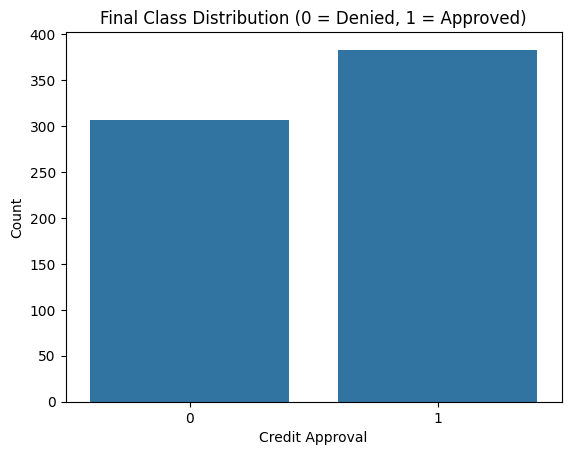

,proportion
A16,
1,0.555072
0,0.444928


In [ ]:
sns.countplot(x='A16', data=df)
plt.title('Final Class Distribution (0 = Denied, 1 = Approved)')
plt.xlabel('Credit Approval')
plt.ylabel('Count')
plt.show()

# Optional: show counts
df['A16'].value_counts(normalize=True)

### 7.2 Summary Statistics for Numerical Features

We display the updated statistical summary of the normalized numerical features.

In [ ]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,0.267130,0.169954,1.233333,0.475362,5.698551,5.098551,0.078014,0.523188,0.427536,0.035821,0.457971,0.176812,0.091781,0.010174,0.555072
std,0.460464,0.178350,0.177792,0.430063,0.850238,4.285748,2.510731,0.117422,0.499824,0.495080,0.072581,0.498592,0.557869,0.086095,0.052101,0.497318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.134135,0.035714,1.000000,0.000000,1.000000,3.000000,0.005789,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000
50%,1.000000,0.221203,0.098214,1.000000,0.000000,5.000000,7.000000,0.035088,1.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.000050,1.000000
75%,1.000000,0.360263,0.257411,1.000000,0.000000,10.000000,7.000000,0.092105,1.000000,1.000000,0.044776,1.000000,0.000000,0.136000,0.003955,1.000000
max,1.000000,1.000000,1.000000,2.000000,2.000000,13.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


### 7.3 Feature Correlation Heatmap

We visualize feature correlations to help identify multicollinearity and assess which variables may be predictive.

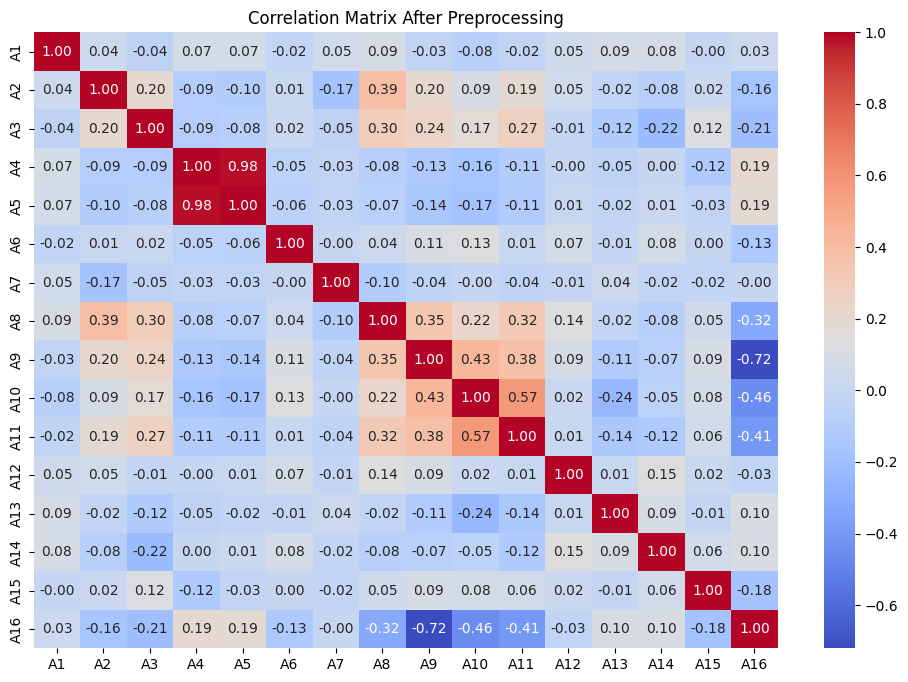

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix After Preprocessing')
plt.show()

### 7.4 Comments on the Final Dataset

After preprocessing, the dataset is now fully numerical, normalized, and ready for use in various machine learning models.  
Key changes include:

- All missing values have been imputed using mode (categorical) or median (numerical).
- Categorical variables were encoded using label encoding.
- Numerical features were normalized to the range [0, 1] using Min-Max scaling.
- The target variable (`A16`) was converted to binary format (0 = Denied, 1 = Approved).

The class distribution remains slightly imbalanced but acceptable for initial model testing. Depending on model performance, we may apply resampling or class weighting later.

The cleaned and transformed dataset is now suitable for training baseline models such as logistic regression, decision trees, and ensemble classifiers.

## 8. Next Steps

Our next steps in our project will be focused on baseline model training, model evaluation, and addressing class imbalance.

### 8.1 Baseline Model Training

In our basemodel training we will implement 3 classification models.


*   Logistic Regression
We will use Logistic Regression because it can give us the probability for credit approval for each feature. This can give us a better interpretation of the data where we can see how different factors impact the outcome. We can also use logistic regression as our baseline because of its simplicity and how easy it is to understand while still providing good data.
*   Decision Tree Classifier
We will Decision Tree Classifier to help find non-linear relationships between features. It proves to be a good model becaue reading a decision path can be helpful in understanding whether someone gets approved or denied.
*   K-Nearest Neighbors
We will use KNN to classify instances based on the class of the other closest K neighbors. It is useful as it uses similar users to model future data. This is especially useful when the data are in clusters.





### 8.2 Model Evaluation

We will then assess the model's performance through several metrics. We will do this by looking at the accuracy, precision, recall, and F1 scores. These classification metrics will help us determine how comprehensive and accurate each model is. We also are going to visually evaluate the models through ROC Curve and AUC. These tools will help illustrate the models performance visually.

### 8.3 Class Imbalance

To lessen the class imbalance issue, we need to adjust the class weights, use resampling techniques, and threshold tuning.
*   Adjusting Class Weights
Adjusitng the the class weights will allow the lower weighted classes to be valued higher. This will allow the classes to have an overall more balanced class weights.
*   Resampling
We can use resampling techniques to help fix the class imbalance. We can do this through oversampling where we increase the number of minority classes by using previous data. This will balance out the classes with less weight. We can also perform undersampling by reducing the majority classes to balance out the data.
*   Threshold Tuning
We can adjust the thresholds of the probibilties to optimize different metrics. We can opimize it for certain metrics such as F1 scores. By doing this we can try to predict the minority weighted classes to have a better performing model.



## 9. Baseline Models


Logistic Regression

In [ ]:
X = df.drop('A16', axis=1)
y = df['A16']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8260869565217391
Confusion Matrix:
 [[61  9]
 [15 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84        70
           1       0.85      0.78      0.82        68

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138



KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("\nK-Nearest Neighbors (KNN) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results
Accuracy: 0.782608695652174
Confusion Matrix:
 [[52 18]
 [12 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.78        70
           1       0.76      0.82      0.79        68

    accuracy                           0.78       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.79      0.78      0.78       138



Decision Trees

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Results
Accuracy: 0.7608695652173914
Confusion Matrix:
 [[50 20]
 [13 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75        70
           1       0.73      0.81      0.77        68

    accuracy                           0.76       138
   macro avg       0.76      0.76      0.76       138
weighted avg       0.76      0.76      0.76       138



Standard Scaler

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('A16')

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

Feature Scaling

In [ ]:

X = df.drop('A16', axis=1)
y = df['A16']

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

selected_columns = X.columns[selector.get_support()]
df_selected = pd.DataFrame(X_selected, columns=selected_columns)

df_selected['A16'] = y.values

df = df_selected

print("Selected Features:")
print(selected_columns.tolist())


Selected Features:
['A2', 'A3', 'A4', 'A5', 'A6', 'A8', 'A9', 'A10', 'A11', 'A15']


Model Training and Evaluation Code


In [ ]:


X = df.drop('A16', axis=1)
y = df['A16']

from scipy.stats import zscore
import numpy as np

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('A16')

z_scores = np.abs(zscore(df[numeric_cols]))

df_no_outliers = df[(z_scores < 3).all(axis=1)]

df = df_no_outliers

print(f"Data shape after outlier removal: {df.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100]
}
log_reg = LogisticRegression(max_iter=1000)
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5)
log_reg_grid.fit(X_train, y_train)

log_reg_best = log_reg_grid.best_estimator_
log_reg_score = log_reg_best.score(X_test, y_test)
print("Best Logistic Regression Params:", log_reg_grid.best_params_)
print("Test Accuracy:", round(log_reg_score, 4))


knn_params = {
    'n_neighbors': list(range(1, 21))
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)

knn_best = knn_grid.best_estimator_
knn_score = knn_best.score(X_test, y_test)
print("Best KNN Params:", knn_grid.best_params_)
print("Test Accuracy:", round(knn_score, 4))

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Data shape after outlier removal: (539, 11)
Best Logistic Regression Params: {'C': 0.1}
Test Accuracy: 0.8417
Best KNN Params: {'n_neighbors': 8}
Test Accuracy: 0.8417

=== Logistic Regression ===
Accuracy: 0.85
Confusion Matrix:
 [[41  4]
 [14 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82        45
           1       0.94      0.81      0.87        75

    accuracy                           0.85       120
   macro avg       0.84      0.86      0.85       120
weighted avg       0.87      0.85      0.85       120


=== K-Nearest Neighbors ===
Accuracy: 0.825
Confusion Matrix:
 [[32 13]
 [ 8 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75        45
           1       0.84      0.89      0.86        75

    accuracy                           0.82       120
   macro avg       0.82      0.80      0.81       120
weighted avg       0

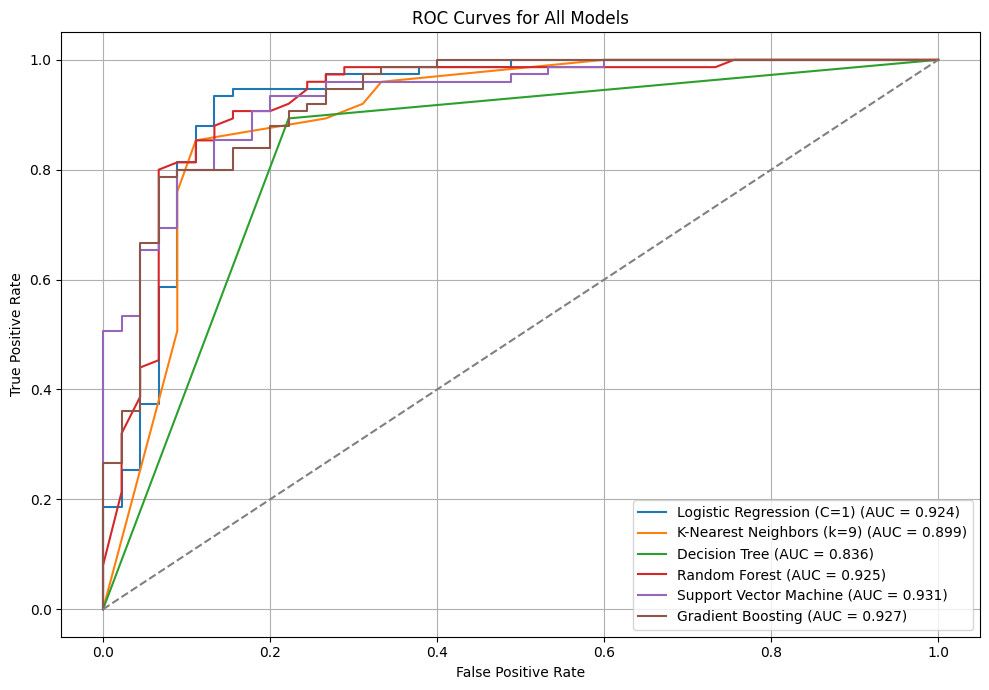

                           AUC Score
Logistic Regression (C=1)     0.9236
K-Nearest Neighbors (k=9)     0.8988
Decision Tree                 0.8356
Random Forest                 0.9250
Support Vector Machine        0.9313
Gradient Boosting             0.9265


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

log_reg_best = LogisticRegression(C=1, max_iter=1000)
knn_best = KNeighborsClassifier(n_neighbors=9)

models_to_compare = {
    "Logistic Regression (C=1)": log_reg_best,
    "K-Nearest Neighbors (k=9)": knn_best,
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

roc_data = {}
for name, model in models_to_compare.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    roc_data[name] = (fpr, tpr, auc_score)

plt.figure(figsize=(10, 7))
for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

import pandas as pd
auc_scores = {name: round(data[2], 4) for name, data in roc_data.items()}
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC Score'])
print(auc_df)


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "Logistic Regression": LogisticRegression(C=1, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=9),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    cv_results[name] = {
        "Mean Accuracy": round(scores.mean(), 4),
        "Std Dev": round(scores.std(), 4)
    }

cv_df = pd.DataFrame(cv_results).T
print(cv_df)


                        Mean Accuracy  Std Dev
Logistic Regression            0.8517   0.1892
K-Nearest Neighbors            0.8350   0.1467
Decision Tree                  0.7650   0.1371
Random Forest                  0.8450   0.1630
Support Vector Machine         0.8383   0.1820
Gradient Boosting              0.8283   0.1662
